### Which PUBG weapon combination is the best?
<hr>
I try to put my interest in this game to productive use by finding out which weapon combination is the best.

**Credits for the dataset**
- https://pubg.gamepedia.com
- https://www.futuregamereleases.com/2019/01/pubg-weapon-damage-charts-body-vs-headshot-limb-utility/
- https://pubgmap.io/weapons.html

**Credit for provision of webscraping reference code**
- [Hackwagon Academy](https://hackwagon.com)

**Credit for Pareto frontier code**
- https://pythonhealthcare.org/tag/pareto-front/

In [48]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Part 1: Webscraping to obtain the dataset
<hr>
Currently, there is no ready dataset containing the statistics of the weapons used in PUBG, so we'll need to scrape the data mainly from PLAYERUNKNOWN'S BATTLEGROUNDS Wiki. Completed with the help of reference codes from Hackwagon Academy.

In [49]:
# Assault rifle
url = 'https://pubg.gamepedia.com/Assault_Rifles'
# Store it in pubgrespsoup
resp = requests.get('https://pubg.gamepedia.com/Assault_Rifles')
pubgrespsoup = BeautifulSoup(resp.text, 'html.parser')

In [46]:
# uncomment to view full HTML
# print(pubgrespsoup.prettify())

In [50]:
# find the table class for the relevant table
table_tag = pubgrespsoup.find('table', attrs={'class':"wikitable"})
# uncomment to view
# print(table_tag.prettify())

In [6]:
# find table headers
rows_tag = table_tag.findAll('tr')
headers = []
header = rows_tag[0]

header_columns = header.findAll('th')

for hc in header_columns:
    headers.append(hc.text.strip())
print(headers)

['Image', 'Name', 'DMG', 'SPD', 'PWR', 'zRNG', 'MAG', 'TBS', 'Mode', 'BSHT', 'BDEL', 'AMM', 'CAP', 'ATTCH', 'BDMG 0', 'BDMG 1', 'BDMG 2', 'BDMG 3', 'HDMG 0', 'HDMG 1', 'HDMG 2', 'HDMG 3']


In [7]:
# append weapon statistics for each category in header
weapons = []
for row in rows_tag[1:]:
    weapon_col = row.findAll('td')
    #print(weapon_col)
    
    weapon_stats = []
    
    for wc in weapon_col:
        weapon_stats.append(wc.text.strip())
   # print(weapon_stats)

    weapon_stats_dict = {}
    for k in range(0,len(headers)):
        weapon_stats_dict[headers[k]] = weapon_stats[k]
    #print(weapon_stats_dict)
    weapons.append(weapon_stats_dict)
    
print(weapons)

[{'Image': '', 'Name': 'AKM', 'DMG': '47', 'SPD': '715 m/s', 'PWR': '10,000', 'zRNG': '100 - 1000', 'MAG': '30', 'TBS': '0.100s', 'Mode': 'Single, Auto', 'BSHT': '-', 'BDEL': '-', 'AMM': '7.62mm', 'CAP': '500', 'ATTCH': '3', 'BDMG 0': '47', 'BDMG 1': '34.30', 'BDMG 2': '29.40', 'BDMG 3': '22', 'HDMG 0': '115.10', 'HDMG 1': '80.60', 'HDMG 2': '69', 'HDMG 3': '51.80'}, {'Image': '', 'Name': 'AUG A3', 'DMG': '41', 'SPD': '940 m/s', 'PWR': '9,000', 'zRNG': '100 - 500', 'MAG': '30', 'TBS': '0.08571', 'Mode': 'Single, Auto', 'BSHT': '-', 'BDEL': '-', 'AMM': '5.56mm', 'CAP': '500', 'ATTCH': '4', 'BDMG 0': '41', 'BDMG 1': '30.10', 'BDMG 2': '25.80', 'BDMG 3': '19.30', 'HDMG 0': '101', 'HDMG 1': '70.70', 'HDMG 2': '60.60', 'HDMG 3': '45.40'}, {'Image': '', 'Name': 'Beryl M762', 'DMG': '46', 'SPD': '715 m/s', 'PWR': '10,000', 'zRNG': '', 'MAG': '30', 'TBS': '0.086', 'Mode': 'Single, Burst, Auto', 'BSHT': '', 'BDEL': '0.086', 'AMM': '7.62mm', 'CAP': '500', 'ATTCH': '4', 'BDMG 0': '46', 'BDMG 1': 

In [8]:
# convert to dataframe
df = pd.DataFrame(weapons)
df.head()

,AMM,ATTCH,BDEL,BDMG 0,BDMG 1,BDMG 2,BDMG 3,BSHT,CAP,DMG,...,HDMG 2,HDMG 3,Image,MAG,Mode,Name,PWR,SPD,TBS,zRNG
0,7.62mm,3,-,47,34.30,29.40,22,-,500,47,...,69,51.80,,30,"Single, Auto",AKM,"10,000",715 m/s,0.100s,100 - 1000
1,5.56mm,4,-,41,30.10,25.80,19.30,-,500,41,...,60.60,45.40,,30,"Single, Auto",AUG A3,"9,000",940 m/s,0.08571,100 - 500
2,7.62mm,4,0.086,46,32.90,28.20,21.10,,500,46,...,66.20,49.70,,30,"Single, Burst, Auto",Beryl M762,"10,000",715 m/s,0.086,
3,5.56mm,4,-,41,30.10,25.80,19.30,-,500,41,...,60.60,45.40,,30,"Single, Auto",G36C,,870 m/s,,
4,7.62mm,3,-,47,34.30,29.40,22,-,500,47,...,69,51.80,,30,"Single, Auto",Groza,"10,000",715 m/s,0.080s,100 - 300


In [9]:
# add in weapon type (we will combine data on all weapon types into one dataframe)
df['type'] = "Assault"
df

,AMM,ATTCH,BDEL,BDMG 0,BDMG 1,BDMG 2,BDMG 3,BSHT,CAP,DMG,...,HDMG 3,Image,MAG,Mode,Name,PWR,SPD,TBS,zRNG,type
0,7.62mm,3,-,47,34.30,29.40,22,-,500,47,...,51.80,,30,"Single, Auto",AKM,"10,000",715 m/s,0.100s,100 - 1000,Assault
1,5.56mm,4,-,41,30.10,25.80,19.30,-,500,41,...,45.40,,30,"Single, Auto",AUG A3,"9,000",940 m/s,0.08571,100 - 500,Assault
2,7.62mm,4,0.086,46,32.90,28.20,21.10,,500,46,...,49.70,,30,"Single, Burst, Auto",Beryl M762,"10,000",715 m/s,0.086,,Assault
3,5.56mm,4,-,41,30.10,25.80,19.30,-,500,41,...,45.40,,30,"Single, Auto",G36C,,870 m/s,,,Assault
4,7.62mm,3,-,47,34.30,29.40,22,-,500,47,...,51.80,,30,"Single, Auto",Groza,"10,000",715 m/s,0.080s,100 - 300,Assault
5,5.56mm,5,0.075,43,30.10,25.80,19.30,3,500,43,...,45.40,,30,"Single, burst",M16A4,"8,000",900 m/s,0.075s,100 - 500,Assault
6,5.56mm,5,-,41,30.10,25.80,19.30,-,500,41,...,45.40,,30,"Single, Auto",M416,"3,500",880 m/s,0.0857s,100 - 400,Assault
7,7.62mm,4,,49,34.30,29.40,22,,500,49,...,51.80,,20,"Single, Burst",Mk47 Mutant,"10,000",780 m/s,,,Assault
8,5.56mm,4,,41,30.10,25.80,19.30,,500,41,...,45.40,,30,"Single, Auto",QBZ95,"9,000",870 m/s,0.092s,,Assault
9,5.56mm,4,-,41,30.10,25.80,19.30,-,500,41,...,45.40,,30,"Single, Auto",SCAR-L,"9,000",870 m/s,0.096s,100 - 500,Assault


In [10]:
# fill in missing data for important variables
# data obtained from: https://pubgmap.io/weapons/rifles.html
df.at[3, 'TBS'] = '0.086s'
df.at[7, 'TBS'] = '0.100s'
# no data on power for G36C, so filled in as average for assault rifles
df.at[3, 'PWR'] = '8,722'
df

,AMM,ATTCH,BDEL,BDMG 0,BDMG 1,BDMG 2,BDMG 3,BSHT,CAP,DMG,...,HDMG 3,Image,MAG,Mode,Name,PWR,SPD,TBS,zRNG,type
0,7.62mm,3,-,47,34.30,29.40,22,-,500,47,...,51.80,,30,"Single, Auto",AKM,"10,000",715 m/s,0.100s,100 - 1000,Assault
1,5.56mm,4,-,41,30.10,25.80,19.30,-,500,41,...,45.40,,30,"Single, Auto",AUG A3,"9,000",940 m/s,0.08571,100 - 500,Assault
2,7.62mm,4,0.086,46,32.90,28.20,21.10,,500,46,...,49.70,,30,"Single, Burst, Auto",Beryl M762,"10,000",715 m/s,0.086,,Assault
3,5.56mm,4,-,41,30.10,25.80,19.30,-,500,41,...,45.40,,30,"Single, Auto",G36C,"8,722",870 m/s,0.086s,,Assault
4,7.62mm,3,-,47,34.30,29.40,22,-,500,47,...,51.80,,30,"Single, Auto",Groza,"10,000",715 m/s,0.080s,100 - 300,Assault
5,5.56mm,5,0.075,43,30.10,25.80,19.30,3,500,43,...,45.40,,30,"Single, burst",M16A4,"8,000",900 m/s,0.075s,100 - 500,Assault
6,5.56mm,5,-,41,30.10,25.80,19.30,-,500,41,...,45.40,,30,"Single, Auto",M416,"3,500",880 m/s,0.0857s,100 - 400,Assault
7,7.62mm,4,,49,34.30,29.40,22,,500,49,...,51.80,,20,"Single, Burst",Mk47 Mutant,"10,000",780 m/s,0.100s,,Assault
8,5.56mm,4,,41,30.10,25.80,19.30,,500,41,...,45.40,,30,"Single, Auto",QBZ95,"9,000",870 m/s,0.092s,,Assault
9,5.56mm,4,-,41,30.10,25.80,19.30,-,500,41,...,45.40,,30,"Single, Auto",SCAR-L,"9,000",870 m/s,0.096s,100 - 500,Assault


In [11]:
# go through the same process for the other weapon types
# Bows
url = 'https://pubg.gamepedia.com/Bows'
# Store it in pubgrespsoup
resp = requests.get('https://pubg.gamepedia.com/Bows')
pubgrespsoup = BeautifulSoup(resp.text, 'html.parser')

table_tag = pubgrespsoup.find('table', attrs={'class':"wikitable"})

rows_tag = table_tag.findAll('tr')
headers = []
header = rows_tag[0]

header_columns = header.findAll('th')

for hc in header_columns:
    headers.append(hc.text.strip())
print(headers)

weapons = []
for row in rows_tag[1:]:
    weapon_col = row.findAll('td')
    #print(weapon_col)
    
    weapon_stats = []
    
    for wc in weapon_col:
        weapon_stats.append(wc.text.strip())
   # print(weapon_stats)

    weapon_stats_dict = {}
    for k in range(0,len(headers)):
        weapon_stats_dict[headers[k]] = weapon_stats[k]
    #print(weapon_stats_dict)
    weapons.append(weapon_stats_dict)
    
print(weapons)

df2 = pd.DataFrame(weapons)
df2['type'] = "Bow"
df2.head()

['Image', 'Name', 'DMG', 'SPD', 'PWR', 'zRNG', 'MAG', 'TBS', 'Mode', 'AMM', 'CAP', 'ATTCH', 'BDMG 0', 'BDMG 1', 'BDMG 2', 'BDMG 3', 'HDMG 0', 'HDMG 1', 'HDMG 2', 'HDMG 3']
[{'Image': '', 'Name': 'Crossbow', 'DMG': '105', 'SPD': '160 m/s', 'PWR': '8,000', 'zRNG': '25', 'MAG': '1', 'TBS': '0.075s', 'Mode': 'Single', 'AMM': 'Bolt', 'CAP': '500', 'ATTCH': '2', 'BDMG 0': '104.70', 'BDMG 1': '73.30', 'BDMG 2': '62.80', 'BDMG 3': '47.10', 'HDMG 0': '241', 'HDMG 1': '168.70', 'HDMG 2': '144.60', 'HDMG 3': '108.40'}]


,AMM,ATTCH,BDMG 0,BDMG 1,BDMG 2,BDMG 3,CAP,DMG,HDMG 0,HDMG 1,...,HDMG 3,Image,MAG,Mode,Name,PWR,SPD,TBS,zRNG,type
0,Bolt,2,104.70,73.30,62.80,47.10,500,105,241,168.70,...,108.40,,1,Single,Crossbow,"8,000",160 m/s,0.075s,25,Bow


In [12]:
# DMR
url = 'https://pubg.gamepedia.com/DMRs'
# Store it in pubgrespsoup
resp = requests.get('https://pubg.gamepedia.com/DMRs')
pubgrespsoup = BeautifulSoup(resp.text, 'html.parser')

table_tag = pubgrespsoup.find('table', attrs={'class':"wikitable"})

rows_tag = table_tag.findAll('tr')
headers = []
header = rows_tag[0]

header_columns = header.findAll('th')

for hc in header_columns:
    headers.append(hc.text.strip())
print(headers)

weapons = []
for row in rows_tag[1:]:
    weapon_col = row.findAll('td')
    #print(weapon_col)
    
    weapon_stats = []
    
    for wc in weapon_col:
        weapon_stats.append(wc.text.strip())
   # print(weapon_stats)

    weapon_stats_dict = {}
    for k in range(0,len(headers)):
        weapon_stats_dict[headers[k]] = weapon_stats[k]
    #print(weapon_stats_dict)
    weapons.append(weapon_stats_dict)
    
print(weapons)

['Image', 'Name', 'DMG', 'SPD', 'PWR', 'zRNG', 'MAG', 'TBS', 'Mode', 'AMM', 'CAP', 'ATTCH', 'BDMG 0', 'BDMG 1', 'BDMG 2', 'BDMG 3', 'HDMG 0', 'HDMG 1', 'HDMG 2', 'HDMG 3']
[{'Image': '', 'Name': 'Mini 14', 'DMG': '46', 'SPD': '990 m/s', 'PWR': '10,000', 'zRNG': '100 - 200', 'MAG': '20', 'TBS': '0.13333s', 'Mode': 'Semi-auto', 'AMM': '5.56mm', 'CAP': '500', 'ATTCH': '3', 'BDMG 0': '48.30', 'BDMG 1': '33.80', 'BDMG 2': '28.90', 'BDMG 3': '21.70', 'HDMG 0': '108.10', 'HDMG 1': '75.60', 'HDMG 2': '64.80', 'HDMG 3': '48.60'}, {'Image': '', 'Name': 'Mk14 EBR', 'DMG': '61', 'SPD': '853 m/s', 'PWR': '20,000', 'zRNG': '100 - 800', 'MAG': '10', 'TBS': '0.090s', 'Mode': 'Semi-auto, Full-auto', 'AMM': '7.62mm', 'CAP': '500', 'ATTCH': '4', 'BDMG 0': '64', 'BDMG 1': '44.80', 'BDMG 2': '38.40', 'BDMG 3': '28.80', 'HDMG 0': '143.30', 'HDMG 1': '100.30', 'HDMG 2': '86', 'HDMG 3': '64.50'}, {'Image': '', 'Name': 'QBU', 'DMG': '48', 'SPD': '945 m/s', 'PWR': '10,000', 'zRNG': '', 'MAG': '10', 'TBS': '', '

In [13]:
df3 = pd.DataFrame(weapons)
df3['type'] = "DMR"
df3

,AMM,ATTCH,BDMG 0,BDMG 1,BDMG 2,BDMG 3,CAP,DMG,HDMG 0,HDMG 1,...,HDMG 3,Image,MAG,Mode,Name,PWR,SPD,TBS,zRNG,type
0,5.56mm,3,48.30,33.80,28.90,21.70,500,46,108.10,75.60,...,48.60,,20,Semi-auto,Mini 14,"10,000",990 m/s,0.13333s,100 - 200,DMR
1,7.62mm,4,64,44.80,38.40,28.80,500,61,143.30,100.30,...,64.50,,10,"Semi-auto, Full-auto",Mk14 EBR,"20,000",853 m/s,0.090s,100 - 800,DMR
2,5.56mm,3,50.40,35.20,30.20,22.60,500,48,112.80,78.90,...,50.70,,10,Semi-auto,QBU,"10,000",945 m/s,,,DMR
3,7.62mm,5,55.60,38.90,33.30,25,500,53,124.50,87.10,...,56,,10,Semi-auto,SKS,"20,000",800 m/s,0.090s,100 - 300,DMR
4,7.62mm,4,60.90,42.60,36.50,27.40,500,58,136.3,95.4,...,61.3,,10,Semi-auto,SLR,"20,000",840 m/s,0.100s,100 - 500,DMR
5,9mm,2,43,30.10,25.80,19.30,500,41,96.30,67.40,...,43.30,,10,"Single, Auto",VSS Vintorez,"20,000",330 m/s,0.086s,100 - 200 (25m increment),DMR


In [14]:
# fill in missing data
# data from: https://pubgmap.io/weapons/dmr.html
df3.at[2, 'TBS'] = '0.100s'
df3

,AMM,ATTCH,BDMG 0,BDMG 1,BDMG 2,BDMG 3,CAP,DMG,HDMG 0,HDMG 1,...,HDMG 3,Image,MAG,Mode,Name,PWR,SPD,TBS,zRNG,type
0,5.56mm,3,48.30,33.80,28.90,21.70,500,46,108.10,75.60,...,48.60,,20,Semi-auto,Mini 14,"10,000",990 m/s,0.13333s,100 - 200,DMR
1,7.62mm,4,64,44.80,38.40,28.80,500,61,143.30,100.30,...,64.50,,10,"Semi-auto, Full-auto",Mk14 EBR,"20,000",853 m/s,0.090s,100 - 800,DMR
2,5.56mm,3,50.40,35.20,30.20,22.60,500,48,112.80,78.90,...,50.70,,10,Semi-auto,QBU,"10,000",945 m/s,0.100s,,DMR
3,7.62mm,5,55.60,38.90,33.30,25,500,53,124.50,87.10,...,56,,10,Semi-auto,SKS,"20,000",800 m/s,0.090s,100 - 300,DMR
4,7.62mm,4,60.90,42.60,36.50,27.40,500,58,136.3,95.4,...,61.3,,10,Semi-auto,SLR,"20,000",840 m/s,0.100s,100 - 500,DMR
5,9mm,2,43,30.10,25.80,19.30,500,41,96.30,67.40,...,43.30,,10,"Single, Auto",VSS Vintorez,"20,000",330 m/s,0.086s,100 - 200 (25m increment),DMR


In [15]:
# SMG
url = 'https://pubg.gamepedia.com/Submachine_Guns'
# Store it in pubgrespsoup
resp = requests.get('https://pubg.gamepedia.com/Submachine_Guns')
pubgrespsoup = BeautifulSoup(resp.text, 'html.parser')

table_tag = pubgrespsoup.find('table', attrs={'class':"wikitable"})

rows_tag = table_tag.findAll('tr')
headers = []
header = rows_tag[0]

header_columns = header.findAll('th')

for hc in header_columns:
    headers.append(hc.text.strip())
print(headers)

weapons = []
for row in rows_tag[1:]:
    weapon_col = row.findAll('td')
    #print(weapon_col)
    
    weapon_stats = []
    
    for wc in weapon_col:
        weapon_stats.append(wc.text.strip())
   # print(weapon_stats)

    weapon_stats_dict = {}
    for k in range(0,len(headers)):
        weapon_stats_dict[headers[k]] = weapon_stats[k]
    #print(weapon_stats_dict)
    weapons.append(weapon_stats_dict)
    
print(weapons)

['Image', 'Name', 'DMG', 'SPD', 'PWR', 'zRNG', 'MAG', 'TBS', 'Mode', 'BSHT', 'BDEL', 'AMM', 'CAP', 'ATTCH', 'BDMG 0', 'BDMG 1', 'BDMG 2', 'BDMG 3', 'HDMG 0', 'HDMG 1', 'HDMG 2', 'HDMG 3']
[{'Image': '', 'Name': 'MP5K', 'DMG': '33', 'SPD': '400 m/s', 'PWR': '7,000', 'zRNG': '100 - 100', 'MAG': '30', 'TBS': '0.0666s', 'Mode': 'Single, Burst, Auto', 'BSHT': '3', 'BDEL': '0.0666s', 'AMM': '9mm', 'CAP': '500', 'ATTCH': '5', 'BDMG 0': '33', 'BDMG 1': '23', 'BDMG 2': '19.80', 'BDMG 3': '14.80', 'HDMG 0': '59.40', 'HDMG 1': '41.50', 'HDMG 2': '35.60', 'HDMG 3': '26.70'}, {'Image': '', 'Name': 'Micro UZI', 'DMG': '26', 'SPD': '350 m/s', 'PWR': '5,000', 'zRNG': '100 - 200', 'MAG': '25', 'TBS': '0.048s', 'Mode': 'Single, Auto', 'BSHT': '-', 'BDEL': '-', 'AMM': '9mm', 'CAP': '500', 'ATTCH': '3', 'BDMG 0': '26', 'BDMG 1': '18.20', 'BDMG 2': '15.60', 'BDMG 3': '11.70', 'HDMG 0': '46.80', 'HDMG 1': '32.70', 'HDMG 2': '28', 'HDMG 3': '21'}, {'Image': '', 'Name': 'PP-19 Bizon', 'DMG': '35', 'SPD': '408

In [16]:
df4 = pd.DataFrame(weapons)
df4['type'] = "SMG"
df4

,AMM,ATTCH,BDEL,BDMG 0,BDMG 1,BDMG 2,BDMG 3,BSHT,CAP,DMG,...,HDMG 3,Image,MAG,Mode,Name,PWR,SPD,TBS,zRNG,type
0,9mm,5,0.0666s,33,23,19.80,14.80,3,500,33,...,26.70,,30,"Single, Burst, Auto",MP5K,"7,000",400 m/s,0.0666s,100 - 100,SMG
1,9mm,3,-,26,18.20,15.60,11.70,-,500,26,...,21,,25,"Single, Auto",Micro UZI,"5,000",350 m/s,0.048s,100 - 200,SMG
2,9mm,2,-,35,24.50,21,15.70,-,500,35,...,28.30,,53,"Single, Auto",PP-19 Bizon,,408 m/s,,,SMG
3,.45 ACP,3,-,40,28,24,18,-,500,40,...,32.40,,30,"Single, Auto",Tommy Gun,"7,000",280 m/s,0.086s,100 - 200,SMG
4,.45 ACP,4,0.085,39,27.30,23.40,17.50,2,500,39,...,31.50,,25,"Single, Burst, Auto",UMP45,"7,000",400 m/s,0.092s,100 - 300,SMG
5,9mm,4,0.0545,31,21.70,18.50,13.90,2,500,31,...,25.10,,19,"Single, Burst, Auto",Vector,"7,000",350 m/s,0.055s,50 - 50,SMG


In [17]:
# no data on time between shots for PP-19 Bizon
# to remove from analysis
df4 = df4[df4.Name != 'PP-19 Bizon']
df4

,AMM,ATTCH,BDEL,BDMG 0,BDMG 1,BDMG 2,BDMG 3,BSHT,CAP,DMG,...,HDMG 3,Image,MAG,Mode,Name,PWR,SPD,TBS,zRNG,type
0,9mm,5,0.0666s,33,23,19.80,14.80,3,500,33,...,26.70,,30,"Single, Burst, Auto",MP5K,"7,000",400 m/s,0.0666s,100 - 100,SMG
1,9mm,3,-,26,18.20,15.60,11.70,-,500,26,...,21,,25,"Single, Auto",Micro UZI,"5,000",350 m/s,0.048s,100 - 200,SMG
3,.45 ACP,3,-,40,28,24,18,-,500,40,...,32.40,,30,"Single, Auto",Tommy Gun,"7,000",280 m/s,0.086s,100 - 200,SMG
4,.45 ACP,4,0.085,39,27.30,23.40,17.50,2,500,39,...,31.50,,25,"Single, Burst, Auto",UMP45,"7,000",400 m/s,0.092s,100 - 300,SMG
5,9mm,4,0.0545,31,21.70,18.50,13.90,2,500,31,...,25.10,,19,"Single, Burst, Auto",Vector,"7,000",350 m/s,0.055s,50 - 50,SMG


In [18]:
# Sniper rifles
url = 'https://pubg.gamepedia.com/Sniper_Rifles'
# Store it in pubgrespsoup
resp = requests.get('https://pubg.gamepedia.com/Sniper_Rifles')
pubgrespsoup = BeautifulSoup(resp.text, 'html.parser')

table_tag = pubgrespsoup.find('table', attrs={'class':"wikitable"})

rows_tag = table_tag.findAll('tr')
headers = []
header = rows_tag[0]

header_columns = header.findAll('th')

for hc in header_columns:
    headers.append(hc.text.strip())
print(headers)

weapons = []
for row in rows_tag[1:]:
    weapon_col = row.findAll('td')
    #print(weapon_col)
    
    weapon_stats = []
    
    for wc in weapon_col:
        weapon_stats.append(wc.text.strip())
   # print(weapon_stats)

    weapon_stats_dict = {}
    for k in range(0,len(headers)):
        weapon_stats_dict[headers[k]] = weapon_stats[k]
    #print(weapon_stats_dict)
    weapons.append(weapon_stats_dict)
    
print(weapons)

['Image', 'Name', 'DMG', 'SPD', 'PWR', 'zRNG', 'MAG', 'TBS', 'Mode', 'AMM', 'CAP', 'ATTCH', 'BDMG 0', 'BDMG 1', 'BDMG 2', 'BDMG 3', 'HDMG 0', 'HDMG 1', 'HDMG 2', 'HDMG 3']
[{'Image': '', 'Name': 'AWM', 'DMG': '105', 'SPD': '945 m/s', 'PWR': '40,000', 'zRNG': '100', 'MAG': '5', 'TBS': '1.85s', 'Mode': 'Single', 'AMM': '.300', 'CAP': '500', 'ATTCH': '4', 'BDMG 0': '136.50', 'BDMG 1': '95.50', 'BDMG 2': '81.80', 'BDMG 3': '61.40', 'HDMG 0': '262.50', 'HDMG 1': '183.70', 'HDMG 2': '157.50', 'HDMG 3': '118.10'}, {'Image': '', 'Name': 'Karabiner 98 Kurz', 'DMG': '79', 'SPD': '760 m/s', 'PWR': '16,000', 'zRNG': '100 - 500', 'MAG': '5', 'TBS': '1.900s', 'Mode': 'Single', 'AMM': '7.62mm', 'CAP': '500', 'ATTCH': '3', 'BDMG 0': '102.70', 'BDMG 1': '71.80', 'BDMG 2': '61.60', 'BDMG 3': '46.20', 'HDMG 0': '197.50', 'HDMG 1': '138.20', 'HDMG 2': '118.50', 'HDMG 3': '88.80'}, {'Image': '', 'Name': 'M24', 'DMG': '75', 'SPD': '790 m/s', 'PWR': '20,000', 'zRNG': '100 - 100', 'MAG': '5', 'TBS': '1.800s',

In [19]:
df5 = pd.DataFrame(weapons)
df5['type'] = "SR"
df5

,AMM,ATTCH,BDMG 0,BDMG 1,BDMG 2,BDMG 3,CAP,DMG,HDMG 0,HDMG 1,...,HDMG 3,Image,MAG,Mode,Name,PWR,SPD,TBS,zRNG,type
0,.300,4,136.50,95.50,81.80,61.40,500,105,262.50,183.70,...,118.10,,5,Single,AWM,"40,000",945 m/s,1.85s,100,SR
1,7.62mm,3,102.70,71.80,61.60,46.20,500,79,197.50,138.20,...,88.80,,5,Single,Karabiner 98 Kurz,"16,000",760 m/s,1.900s,100 - 500,SR
2,7.62mm,4,102.70,71.80,61.60,46.20,500,75,197.50,138.20,...,88.80,,5,Single,M24,"20,000",790 m/s,1.800s,100 - 100,SR
3,7.62mm,-,102.70,71.80,61.60,46.20,500,,197.50,138.20,...,88.80,,5,Single,Mosin Nagant,,,,,SR
4,.45 ACP,1,72.60,50.80,43.50,32.60,500,66,165,115.40,...,74.20,,8,Single,Winchester Model 1894,"16,000",760 m/s,0.6s,100 - 500,SR


In [20]:
# no data for Mosin Nagant
# to remove from analysis
df5 = df5[df5.Name != 'Mosin Nagant']
df5

,AMM,ATTCH,BDMG 0,BDMG 1,BDMG 2,BDMG 3,CAP,DMG,HDMG 0,HDMG 1,...,HDMG 3,Image,MAG,Mode,Name,PWR,SPD,TBS,zRNG,type
0,.300,4,136.50,95.50,81.80,61.40,500,105,262.50,183.70,...,118.10,,5,Single,AWM,"40,000",945 m/s,1.85s,100,SR
1,7.62mm,3,102.70,71.80,61.60,46.20,500,79,197.50,138.20,...,88.80,,5,Single,Karabiner 98 Kurz,"16,000",760 m/s,1.900s,100 - 500,SR
2,7.62mm,4,102.70,71.80,61.60,46.20,500,75,197.50,138.20,...,88.80,,5,Single,M24,"20,000",790 m/s,1.800s,100 - 100,SR
4,.45 ACP,1,72.60,50.80,43.50,32.60,500,66,165,115.40,...,74.20,,8,Single,Winchester Model 1894,"16,000",760 m/s,0.6s,100 - 500,SR


In [21]:
# Shotguns
url = 'https://pubg.gamepedia.com/Shotguns'
# Store it in pubgrespsoup
resp = requests.get('https://pubg.gamepedia.com/Shotguns')
pubgrespsoup = BeautifulSoup(resp.text, 'html.parser')

table_tag = pubgrespsoup.find('table', attrs={'class':"wikitable"})

rows_tag = table_tag.findAll('tr')
headers = []
header = rows_tag[0]

header_columns = header.findAll('th')

for hc in header_columns:
    headers.append(hc.text.strip())
print(headers)

weapons = []
for row in rows_tag[1:]:
    weapon_col = row.findAll('td')
    #print(weapon_col)
    
    weapon_stats = []
    
    for wc in weapon_col:
        weapon_stats.append(wc.text.strip())
   # print(weapon_stats)

    weapon_stats_dict = {}
    for k in range(0,len(headers)):
        weapon_stats_dict[headers[k]] = weapon_stats[k]
    #print(weapon_stats_dict)
    weapons.append(weapon_stats_dict)
    
print(weapons)

df6 = pd.DataFrame(weapons)
df6['type'] = "SG"
df6

['Image', 'Name', 'DMG', 'SPD', 'PWR', 'zRNG', 'MAG', 'TBS', 'Mode', 'AMM', 'CAP', 'ATTCH', 'BDMG 0', 'BDMG 1', 'BDMG 2', 'BDMG 3', 'HDMG 0', 'HDMG 1', 'HDMG 2', 'HDMG 3']
[{'Image': '', 'Name': 'DBS', 'DMG': '26', 'SPD': '', 'PWR': '', 'zRNG': '0 - 100', 'MAG': '14', 'TBS': '', 'Mode': '', 'AMM': '12 Gauge', 'CAP': '500', 'ATTCH': '1', 'BDMG 0': '18.1×9', 'BDMG 1': '12.6×9', 'BDMG 2': '10.8×9', 'BDMG 3': '8.1×9', 'HDMG 0': '24.1×9', 'HDMG 1': '16.9×9', 'HDMG 2': '14.5×9', 'HDMG 3': '10.8×9'}, {'Image': '', 'Name': 'S12K', 'DMG': '24', 'SPD': '350 m/s', 'PWR': '5,000', 'zRNG': '25 - 25', 'MAG': '5', 'TBS': '0.250s', 'Mode': 'Single', 'AMM': '12 Gauge', 'CAP': '500', 'ATTCH': '3', 'BDMG 0': '31.40×9', 'BDMG 1': '22×9', 'BDMG 2': '18.80×9', 'BDMG 3': '14.10×9', 'HDMG 0': '20.90×9', 'HDMG 1': '14.60×9', 'HDMG 2': '12.50×9', 'HDMG 3': '9.40×9'}, {'Image': '', 'Name': 'S1897', 'DMG': '26', 'SPD': '360 m/s', 'PWR': '5,000', 'zRNG': '25 - 25', 'MAG': '5', 'TBS': '0.750s', 'Mode': 'Single', 'A

,AMM,ATTCH,BDMG 0,BDMG 1,BDMG 2,BDMG 3,CAP,DMG,HDMG 0,HDMG 1,...,HDMG 3,Image,MAG,Mode,Name,PWR,SPD,TBS,zRNG,type
0,12 Gauge,1,18.1×9,12.6×9,10.8×9,8.1×9,500,26,24.1×9,16.9×9,...,10.8×9,,14,,DBS,,,,0 - 100,SG
1,12 Gauge,3,31.40×9,22×9,18.80×9,14.10×9,500,24,20.90×9,14.60×9,...,9.40×9,,5,Single,S12K,"5,000",350 m/s,0.250s,25 - 25,SG
2,12 Gauge,2,22.70×9,15.90×9,13.60×9,10.20×9,500,26,34.10×9,23.90×9,...,15.30×9,,5,Single,S1897,"5,000",360 m/s,0.750s,25 - 25,SG
3,12 Gauge,2,23.10×9,16.20×9,13.80×9,10.40×9,500,26,34.70×9,24.30×9,...,15.60×9,,2,Single,S686,"5,000",370 m/s,0.200s,Fixed (50m),SG
4,12 Gauge,1,19.90×8,13.90×8,11.90×8,8.90×8,80,22,29.80×8,20.90×8,...,13.40×8,,2,Single,Sawed-off,"8,000",330 m/s,0.25,100 - 100,SG


In [22]:
df6 = df6[df6.Name != 'DBS']
# clean up weird data on body damage and head damage
# data taken from https://www.futuregamereleases.com/2019/01/pubg-weapon-damage-charts-body-vs-headshot-limb-utility/
# For S12K
df6.at[1, 'BDMG 0'] = 198
df6.at[1, 'BDMG 1'] = 139
df6.at[1, 'BDMG 2'] = 119
df6.at[1, 'BDMG 3'] = 89.1
df6.at[1, 'HDMG 0'] = 297
df6.at[1, 'HDMG 1'] = 207.9
df6.at[1, 'HDMG 2'] = 178.2
df6.at[1, 'HDMG 3'] = 133.7

# For S1897
df6.at[2, 'BDMG 0'] = 216
df6.at[2, 'BDMG 1'] = 151
df6.at[2, 'BDMG 2'] = 130
df6.at[2, 'BDMG 3'] = 97.2
df6.at[2, 'HDMG 0'] = 324
df6.at[2, 'HDMG 1'] = 226.8
df6.at[2, 'HDMG 2'] = 194.5
df6.at[2, 'HDMG 3'] = 145.8

# For S686
df6.at[3, 'BDMG 0'] = 216
df6.at[3, 'BDMG 1'] = 151
df6.at[3, 'BDMG 2'] = 130
df6.at[3, 'BDMG 3'] = 97.2
df6.at[3, 'HDMG 0'] = 324
df6.at[3, 'HDMG 1'] = 226.8
df6.at[3, 'HDMG 2'] = 194.5
df6.at[3, 'HDMG 3'] = 145.8

# For Sawed-off
df6.at[4, 'BDMG 0'] = 160
df6.at[4, 'BDMG 1'] = 112
df6.at[4, 'BDMG 2'] = 96
df6.at[4, 'BDMG 3'] = 72
df6.at[4, 'HDMG 0'] = 320
df6.at[4, 'HDMG 1'] = 224
df6.at[4, 'HDMG 2'] = 192
df6.at[4, 'HDMG 3'] = 144
df6

,AMM,ATTCH,BDMG 0,BDMG 1,BDMG 2,BDMG 3,CAP,DMG,HDMG 0,HDMG 1,...,HDMG 3,Image,MAG,Mode,Name,PWR,SPD,TBS,zRNG,type
1,12 Gauge,3,198,139,119,89.1,500,24,297,207.9,...,133.7,,5,Single,S12K,"5,000",350 m/s,0.250s,25 - 25,SG
2,12 Gauge,2,216,151,130,97.2,500,26,324,226.8,...,145.8,,5,Single,S1897,"5,000",360 m/s,0.750s,25 - 25,SG
3,12 Gauge,2,216,151,130,97.2,500,26,324,226.8,...,145.8,,2,Single,S686,"5,000",370 m/s,0.200s,Fixed (50m),SG
4,12 Gauge,1,160,112,96,72,80,22,320,224,...,144,,2,Single,Sawed-off,"8,000",330 m/s,0.25,100 - 100,SG


In [23]:
# Light machine guns
url = 'https://pubg.gamepedia.com/Light_Machine_Guns'
# Store it in pubgrespsoup
resp = requests.get('https://pubg.gamepedia.com/Light_Machine_Guns')
pubgrespsoup = BeautifulSoup(resp.text, 'html.parser')

table_tag = pubgrespsoup.find('table', attrs={'class':"wikitable"})

rows_tag = table_tag.findAll('tr')
headers = []
header = rows_tag[0]

header_columns = header.findAll('th')

for hc in header_columns:
    headers.append(hc.text.strip())
print(headers)

weapons = []
for row in rows_tag[1:]:
    weapon_col = row.findAll('td')
    #print(weapon_col)
    
    weapon_stats = []
    
    for wc in weapon_col:
        weapon_stats.append(wc.text.strip())
   # print(weapon_stats)

    weapon_stats_dict = {}
    for k in range(0,len(headers)):
        weapon_stats_dict[headers[k]] = weapon_stats[k]
    #print(weapon_stats_dict)
    weapons.append(weapon_stats_dict)
    
print(weapons)

['Image', 'Name', 'DMG', 'SPD', 'PWR', 'zRNG', 'MAG', 'TBS', 'Mode', 'AMM', 'CAP', 'ATTCH', 'BDMG 0', 'BDMG 1', 'BDMG 2', 'BDMG 3', 'HDMG 0', 'HDMG 1', 'HDMG 2', 'HDMG 3']
[{'Image': '', 'Name': 'DP-28', 'DMG': '51', 'SPD': '715 m/s', 'PWR': '10,000', 'zRNG': '100 - 1000', 'MAG': '47', 'TBS': '0.109', 'Mode': 'Auto', 'AMM': '7.62mm', 'CAP': '500', 'ATTCH': '1', 'BDMG 0': '51', 'BDMG 1': '35.60', 'BDMG 2': '30.60', 'BDMG 3': '22.90', 'HDMG 0': '117.30', 'HDMG 1': '82.10', 'HDMG 2': '70.30', 'HDMG 3': '52.70'}, {'Image': '', 'Name': 'M249', 'DMG': '45', 'SPD': '915 m/s', 'PWR': '10,000', 'zRNG': '100 - 500', 'MAG': '100', 'TBS': '0.075s', 'Mode': 'Auto', 'AMM': '5.56mm', 'CAP': '500', 'ATTCH': '1', 'BDMG 0': '45', 'BDMG 1': '31.40', 'BDMG 2': '27', 'BDMG 3': '20.20', 'HDMG 0': '103.40', 'HDMG 1': '72.40', 'HDMG 2': '62', 'HDMG 3': '46.50'}]


In [24]:
df7 = pd.DataFrame(weapons)
df7['type'] = "LMG"
df7

,AMM,ATTCH,BDMG 0,BDMG 1,BDMG 2,BDMG 3,CAP,DMG,HDMG 0,HDMG 1,...,HDMG 3,Image,MAG,Mode,Name,PWR,SPD,TBS,zRNG,type
0,7.62mm,1,51,35.60,30.60,22.90,500,51,117.30,82.10,...,52.70,,47,Auto,DP-28,"10,000",715 m/s,0.109,100 - 1000,LMG
1,5.56mm,1,45,31.40,27,20.20,500,45,103.40,72.40,...,46.50,,100,Auto,M249,"10,000",915 m/s,0.075s,100 - 500,LMG


In [25]:
# Pistols
url = 'https://pubg.gamepedia.com/Pistols'
# Store it in pubgrespsoup
resp = requests.get('https://pubg.gamepedia.com/Pistols')
pubgrespsoup = BeautifulSoup(resp.text, 'html.parser')

table_tag = pubgrespsoup.find('table', attrs={'class':"wikitable"})

rows_tag = table_tag.findAll('tr')
headers = []
header = rows_tag[0]

header_columns = header.findAll('th')

for hc in header_columns:
    headers.append(hc.text.strip())
print(headers)

weapons = []
for row in rows_tag[1:]:
    weapon_col = row.findAll('td')
    #print(weapon_col)
    
    weapon_stats = []
    
    for wc in weapon_col:
        weapon_stats.append(wc.text.strip())
   # print(weapon_stats)

    weapon_stats_dict = {}
    for k in range(0,len(headers)):
        weapon_stats_dict[headers[k]] = weapon_stats[k]
    #print(weapon_stats_dict)
    weapons.append(weapon_stats_dict)
    
print(weapons)

['Image', 'Name', 'DMG', 'SPD', 'PWR', 'zRNG', 'MAG', 'TBS', 'Mode', 'AMM', 'CAP', 'ATTCH', 'BDMG 0', 'BDMG 1', 'BDMG 2', 'BDMG 3', 'HDMG 0', 'HDMG 1', 'HDMG 2', 'HDMG 3']
[{'Image': '', 'Name': 'Deagle', 'DMG': '62', 'SPD': '450 m/s', 'PWR': '', 'zRNG': '', 'MAG': '7', 'TBS': '0.25s', 'Mode': 'Single', 'AMM': '.45 ACP', 'CAP': '100', 'ATTCH': '3', 'BDMG 0': '62', 'BDMG 1': '43.40', 'BDMG 2': '37.10', 'BDMG 3': '27.90', 'HDMG 0': '124', 'HDMG 1': '86.80', 'HDMG 2': '74.30', 'HDMG 3': '55.80'}, {'Image': '', 'Name': 'Flare Gun', 'DMG': '', 'SPD': '', 'PWR': '', 'zRNG': '', 'MAG': '1', 'TBS': '3.5s', 'Mode': 'Single', 'AMM': 'Flare', 'CAP': '500', 'ATTCH': '0', 'BDMG 0': '', 'BDMG 1': '', 'BDMG 2': '', 'BDMG 3': '', 'HDMG 0': '', 'HDMG 1': '', 'HDMG 2': '', 'HDMG 3': ''}, {'Image': '', 'Name': 'P18C', 'DMG': '23', 'SPD': '375 m/s', 'PWR': '7,000', 'zRNG': '50 - 50', 'MAG': '17', 'TBS': '0.06s', 'Mode': 'Single, Auto', 'AMM': '9mm', 'CAP': '100', 'ATTCH': '4', 'BDMG 0': '22.40', 'BDMG 1':

In [26]:
df8 = pd.DataFrame(weapons)
df8['type'] = "Pistol"

df8 = df8[df8.Name != 'Flare Gun']
df8

,AMM,ATTCH,BDMG 0,BDMG 1,BDMG 2,BDMG 3,CAP,DMG,HDMG 0,HDMG 1,...,HDMG 3,Image,MAG,Mode,Name,PWR,SPD,TBS,zRNG,type
0,.45 ACP,3,62,43.40,37.10,27.90,100,62,124,86.80,...,55.80,,7,Single,Deagle,,450 m/s,0.25s,,Pistol
2,9mm,4,22.40,15.70,13.40,10.10,100,23,44.90,31.40,...,20.20,,17,"Single, Auto",P18C,"7,000",375 m/s,0.06s,50 - 50,Pistol
3,.45 ACP,4,40.60,28.40,24.30,18.20,100,41,81.20,56.80,...,36.50,,7,Single,P1911,"6,000",250 m/s,0.110s,50 - 50,Pistol
4,9mm,4,34.50,24.20,20.70,15.50,100,35,69.10,48.40,...,31.10,,15,Single,P92,"7,000",380 m/s,0.090s,50 - 50,Pistol
5,7.62mm,1,54.80,38.30,32.80,24.60,80,55,109.60,76.70,...,49.30,,7,Single,R1895,"8,000",330 m/s,0.400s,50 - 50,Pistol
6,.45 ACP,2,54.80,38.30,32.80,24.60,80,55,109.60,76.70,...,49.30,,6,Single,R45,"8,000",330 m/s,0.25s,50 - 50,Pistol
7,9mm,5,22,15.40,13.20,9.90,500,22,44,30.80,...,19.80,,20,"Single, Auto",Skorpion,"5,000",350 m/s,0.070588s,100 - 100,Pistol


In [47]:
# no data on power for Deagle, taken to be average for pistols
df8.at[0, 'PWR'] = '6,833'
df8

,AMM,ATTCH,BDMG 0,BDMG 1,BDMG 2,BDMG 3,CAP,DMG,HDMG 0,HDMG 1,...,HDMG 3,Image,MAG,Mode,Name,PWR,SPD,TBS,zRNG,type
0,.45 ACP,3,62,43.40,37.10,27.90,100,62,124,86.80,...,55.80,,7,Single,Deagle,"6,833",450 m/s,0.25s,,Pistol
2,9mm,4,22.40,15.70,13.40,10.10,100,23,44.90,31.40,...,20.20,,17,"Single, Auto",P18C,"7,000",375 m/s,0.06s,50 - 50,Pistol
3,.45 ACP,4,40.60,28.40,24.30,18.20,100,41,81.20,56.80,...,36.50,,7,Single,P1911,"6,000",250 m/s,0.110s,50 - 50,Pistol
4,9mm,4,34.50,24.20,20.70,15.50,100,35,69.10,48.40,...,31.10,,15,Single,P92,"7,000",380 m/s,0.090s,50 - 50,Pistol
5,7.62mm,1,54.80,38.30,32.80,24.60,80,55,109.60,76.70,...,49.30,,7,Single,R1895,"8,000",330 m/s,0.400s,50 - 50,Pistol
6,.45 ACP,2,54.80,38.30,32.80,24.60,80,55,109.60,76.70,...,49.30,,6,Single,R45,"8,000",330 m/s,0.25s,50 - 50,Pistol
7,9mm,5,22,15.40,13.20,9.90,500,22,44,30.80,...,19.80,,20,"Single, Auto",Skorpion,"5,000",350 m/s,0.070588s,100 - 100,Pistol


In [48]:
# merge statstics for all weapon types into a single dataframe
weapon_df = pd.concat([df,df2,df3,df4,df5,df6,df7,df8], ignore_index=True)
weapon_df

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,AMM,ATTCH,BDEL,BDMG 0,BDMG 1,BDMG 2,BDMG 3,BSHT,CAP,DMG,...,HDMG 3,Image,MAG,Mode,Name,PWR,SPD,TBS,type,zRNG
0,7.62mm,3,-,47,34.30,29.40,22,-,500,47,...,51.80,,30,"Single, Auto",AKM,"10,000",715 m/s,0.100s,Assault,100 - 1000
1,5.56mm,4,-,41,30.10,25.80,19.30,-,500,41,...,45.40,,30,"Single, Auto",AUG A3,"9,000",940 m/s,0.08571,Assault,100 - 500
2,7.62mm,4,0.086,46,32.90,28.20,21.10,,500,46,...,49.70,,30,"Single, Burst, Auto",Beryl M762,"10,000",715 m/s,0.086,Assault,
3,5.56mm,4,-,41,30.10,25.80,19.30,-,500,41,...,45.40,,30,"Single, Auto",G36C,"8,722",870 m/s,0.086s,Assault,
4,7.62mm,3,-,47,34.30,29.40,22,-,500,47,...,51.80,,30,"Single, Auto",Groza,"10,000",715 m/s,0.080s,Assault,100 - 300
5,5.56mm,5,0.075,43,30.10,25.80,19.30,3,500,43,...,45.40,,30,"Single, burst",M16A4,"8,000",900 m/s,0.075s,Assault,100 - 500
6,5.56mm,5,-,41,30.10,25.80,19.30,-,500,41,...,45.40,,30,"Single, Auto",M416,"3,500",880 m/s,0.0857s,Assault,100 - 400
7,7.62mm,4,,49,34.30,29.40,22,,500,49,...,51.80,,20,"Single, Burst",Mk47 Mutant,"10,000",780 m/s,0.100s,Assault,
8,5.56mm,4,,41,30.10,25.80,19.30,,500,41,...,45.40,,30,"Single, Auto",QBZ95,"9,000",870 m/s,0.092s,Assault,
9,5.56mm,4,-,41,30.10,25.80,19.30,-,500,41,...,45.40,,30,"Single, Auto",SCAR-L,"9,000",870 m/s,0.096s,Assault,100 - 500


In [49]:
# remove columns that are do not contain any useful information
del weapon_df['Image']
del weapon_df['zRNG']

weapon_df

,AMM,ATTCH,BDEL,BDMG 0,BDMG 1,BDMG 2,BDMG 3,BSHT,CAP,DMG,...,HDMG 1,HDMG 2,HDMG 3,MAG,Mode,Name,PWR,SPD,TBS,type
0,7.62mm,3,-,47,34.30,29.40,22,-,500,47,...,80.60,69,51.80,30,"Single, Auto",AKM,"10,000",715 m/s,0.100s,Assault
1,5.56mm,4,-,41,30.10,25.80,19.30,-,500,41,...,70.70,60.60,45.40,30,"Single, Auto",AUG A3,"9,000",940 m/s,0.08571,Assault
2,7.62mm,4,0.086,46,32.90,28.20,21.10,,500,46,...,77.30,66.20,49.70,30,"Single, Burst, Auto",Beryl M762,"10,000",715 m/s,0.086,Assault
3,5.56mm,4,-,41,30.10,25.80,19.30,-,500,41,...,70.70,60.60,45.40,30,"Single, Auto",G36C,"8,722",870 m/s,0.086s,Assault
4,7.62mm,3,-,47,34.30,29.40,22,-,500,47,...,80.60,69,51.80,30,"Single, Auto",Groza,"10,000",715 m/s,0.080s,Assault
5,5.56mm,5,0.075,43,30.10,25.80,19.30,3,500,43,...,70.70,60.60,45.40,30,"Single, burst",M16A4,"8,000",900 m/s,0.075s,Assault
6,5.56mm,5,-,41,30.10,25.80,19.30,-,500,41,...,70.70,60.60,45.40,30,"Single, Auto",M416,"3,500",880 m/s,0.0857s,Assault
7,7.62mm,4,,49,34.30,29.40,22,,500,49,...,80.60,69,51.80,20,"Single, Burst",Mk47 Mutant,"10,000",780 m/s,0.100s,Assault
8,5.56mm,4,,41,30.10,25.80,19.30,,500,41,...,70.70,60.60,45.40,30,"Single, Auto",QBZ95,"9,000",870 m/s,0.092s,Assault
9,5.56mm,4,-,41,30.10,25.80,19.30,-,500,41,...,70.70,60.60,45.40,30,"Single, Auto",SCAR-L,"9,000",870 m/s,0.096s,Assault


In [50]:
weapon_df.dtypes
# need to convert datatypes to float

AMM       object
ATTCH     object
BDEL      object
BDMG 0    object
BDMG 1    object
BDMG 2    object
BDMG 3    object
BSHT      object
CAP       object
DMG       object
HDMG 0    object
HDMG 1    object
HDMG 2    object
HDMG 3    object
MAG       object
Mode      object
Name      object
PWR       object
SPD       object
TBS       object
type      object
dtype: object

In [51]:
# clean and convert dtypes
# note: NA values have been changed to 0 to allow for data type conversion
# only for attch, bdel, bsht
weapon_df['ATTCH'] = weapon_df['ATTCH'].apply(lambda x: x.replace('-', '0')
                                if isinstance(x, str) else x).astype(float)

weapon_df['BDEL'] = weapon_df['BDEL'].replace('', np.nan)
weapon_df['BDEL'] = weapon_df['BDEL'].fillna('0')
weapon_df['BDEL'] = weapon_df['BDEL'].apply(lambda x: x.replace('-', '0').replace('s', '')
                               if isinstance(x, str) else x).astype(float)

weapon_df['BSHT'] = weapon_df['BSHT'].replace('', np.nan)
weapon_df['BSHT'] = weapon_df['BSHT'].fillna('0')
weapon_df['BSHT'] = weapon_df['BSHT'].apply(lambda x: x.replace('-', '0')
                               if isinstance(x, str) else x).astype(float)

weapon_df['MAG'] = weapon_df['MAG'].astype(float)

weapon_df['PWR'] = weapon_df['PWR'].apply(lambda x: x.replace(',', '')
                                if isinstance(x, str) else x).astype(float)

weapon_df['SPD'] = weapon_df['SPD'].apply(lambda x: x.replace('m/s', '')
                                if isinstance(x, str) else x).astype(float)

# in seconds
weapon_df['TBS'] = weapon_df['TBS'].apply(lambda x: x.replace('s', '')
                                if isinstance(x, str) else x).astype(float)

weapon_df.dtypes

AMM        object
ATTCH     float64
BDEL      float64
BDMG 0     object
BDMG 1     object
BDMG 2     object
BDMG 3     object
BSHT      float64
CAP        object
DMG        object
HDMG 0     object
HDMG 1     object
HDMG 2     object
HDMG 3     object
MAG       float64
Mode       object
Name       object
PWR       float64
SPD       float64
TBS       float64
type       object
dtype: object

In [52]:
# to make sure that the data is cleaned properly
weapon_df

,AMM,ATTCH,BDEL,BDMG 0,BDMG 1,BDMG 2,BDMG 3,BSHT,CAP,DMG,...,HDMG 1,HDMG 2,HDMG 3,MAG,Mode,Name,PWR,SPD,TBS,type
0,7.62mm,3.0,0.0000,47,34.30,29.40,22,0.0,500,47,...,80.60,69,51.80,30.0,"Single, Auto",AKM,10000.0,715.0,0.100000,Assault
1,5.56mm,4.0,0.0000,41,30.10,25.80,19.30,0.0,500,41,...,70.70,60.60,45.40,30.0,"Single, Auto",AUG A3,9000.0,940.0,0.085710,Assault
2,7.62mm,4.0,0.0860,46,32.90,28.20,21.10,0.0,500,46,...,77.30,66.20,49.70,30.0,"Single, Burst, Auto",Beryl M762,10000.0,715.0,0.086000,Assault
3,5.56mm,4.0,0.0000,41,30.10,25.80,19.30,0.0,500,41,...,70.70,60.60,45.40,30.0,"Single, Auto",G36C,8722.0,870.0,0.086000,Assault
4,7.62mm,3.0,0.0000,47,34.30,29.40,22,0.0,500,47,...,80.60,69,51.80,30.0,"Single, Auto",Groza,10000.0,715.0,0.080000,Assault
5,5.56mm,5.0,0.0750,43,30.10,25.80,19.30,3.0,500,43,...,70.70,60.60,45.40,30.0,"Single, burst",M16A4,8000.0,900.0,0.075000,Assault
6,5.56mm,5.0,0.0000,41,30.10,25.80,19.30,0.0,500,41,...,70.70,60.60,45.40,30.0,"Single, Auto",M416,3500.0,880.0,0.085700,Assault
7,7.62mm,4.0,0.0000,49,34.30,29.40,22,0.0,500,49,...,80.60,69,51.80,20.0,"Single, Burst",Mk47 Mutant,10000.0,780.0,0.100000,Assault
8,5.56mm,4.0,0.0000,41,30.10,25.80,19.30,0.0,500,41,...,70.70,60.60,45.40,30.0,"Single, Auto",QBZ95,9000.0,870.0,0.092000,Assault
9,5.56mm,4.0,0.0000,41,30.10,25.80,19.30,0.0,500,41,...,70.70,60.60,45.40,30.0,"Single, Auto",SCAR-L,9000.0,870.0,0.096000,Assault


In [53]:
weapon_df.to_csv('pubg.csv')

## Part 2: Exploratory data analysis
<hr>
Finding trends of tradeoffs between features that are most important for success in the game.

In [2]:
# start from here
# load dataset each time
df = pd.read_csv('pubg.csv', index_col = 0)
df

,AMM,ATTCH,BDEL,BDMG 0,BDMG 1,BDMG 2,BDMG 3,BSHT,CAP,DMG,...,HDMG 1,HDMG 2,HDMG 3,MAG,Mode,Name,PWR,SPD,TBS,type
0,7.62mm,3.0,0.0000,47.0,34.3,29.4,22.0,0.0,500,47,...,80.6,69.0,51.8,30.0,"Single, Auto",AKM,10000.0,715.0,0.100000,Assault
1,5.56mm,4.0,0.0000,41.0,30.1,25.8,19.3,0.0,500,41,...,70.7,60.6,45.4,30.0,"Single, Auto",AUG A3,9000.0,940.0,0.085710,Assault
2,7.62mm,4.0,0.0860,46.0,32.9,28.2,21.1,0.0,500,46,...,77.3,66.2,49.7,30.0,"Single, Burst, Auto",Beryl M762,10000.0,715.0,0.086000,Assault
3,5.56mm,4.0,0.0000,41.0,30.1,25.8,19.3,0.0,500,41,...,70.7,60.6,45.4,30.0,"Single, Auto",G36C,8722.0,870.0,0.086000,Assault
4,7.62mm,3.0,0.0000,47.0,34.3,29.4,22.0,0.0,500,47,...,80.6,69.0,51.8,30.0,"Single, Auto",Groza,10000.0,715.0,0.080000,Assault
5,5.56mm,5.0,0.0750,43.0,30.1,25.8,19.3,3.0,500,43,...,70.7,60.6,45.4,30.0,"Single, burst",M16A4,8000.0,900.0,0.075000,Assault
6,5.56mm,5.0,0.0000,41.0,30.1,25.8,19.3,0.0,500,41,...,70.7,60.6,45.4,30.0,"Single, Auto",M416,3500.0,880.0,0.085700,Assault
7,7.62mm,4.0,0.0000,49.0,34.3,29.4,22.0,0.0,500,49,...,80.6,69.0,51.8,20.0,"Single, Burst",Mk47 Mutant,10000.0,780.0,0.100000,Assault
8,5.56mm,4.0,0.0000,41.0,30.1,25.8,19.3,0.0,500,41,...,70.7,60.6,45.4,30.0,"Single, Auto",QBZ95,9000.0,870.0,0.092000,Assault
9,5.56mm,4.0,0.0000,41.0,30.1,25.8,19.3,0.0,500,41,...,70.7,60.6,45.4,30.0,"Single, Auto",SCAR-L,9000.0,870.0,0.096000,Assault


In [55]:
# check to make sure that data type of each column is correct
df.dtypes

AMM        object
ATTCH     float64
BDEL      float64
BDMG 0    float64
BDMG 1    float64
BDMG 2    float64
BDMG 3    float64
BSHT      float64
CAP         int64
DMG         int64
HDMG 0    float64
HDMG 1    float64
HDMG 2    float64
HDMG 3    float64
MAG       float64
Mode       object
Name       object
PWR       float64
SPD       float64
TBS       float64
type       object
dtype: object

In [3]:
# convert from miliseconds to seconds
df['SPD'] = df['SPD']/1000

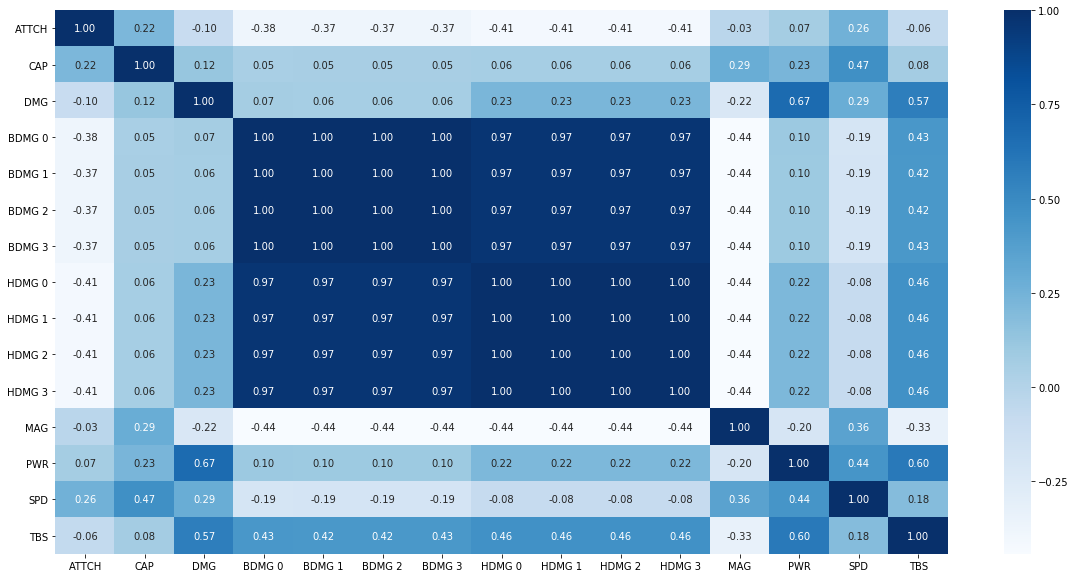

In [4]:
# looking at whether things different factors move together
fig, ax = plt.subplots(1,1, figsize=(20,10))
all_col = ['ATTCH', 'CAP', 'DMG', 'BDMG 0', 'BDMG 1', 'BDMG 2', 'BDMG 3', 'HDMG 0', 'HDMG 1', 'HDMG 2', 'HDMG 3', 'MAG', 'PWR', 'SPD', 'TBS']
all_var = df[all_col]
all_cor = sns.heatmap(all_var.corr(), annot=True, fmt=".2f", cmap = "Blues")
#plt.savefig('all_corr.png', bbox_inches='tight')

# body damage and head damage across the different levels seem to be highly correlated
# weirdly low correlation between damage and body/head damage but body and head damage are more important indicators
# can reduce number of dimensions we look at: keep BDMG 1, HDMG 1 (although both are highly correlated, keep both just to be safe)

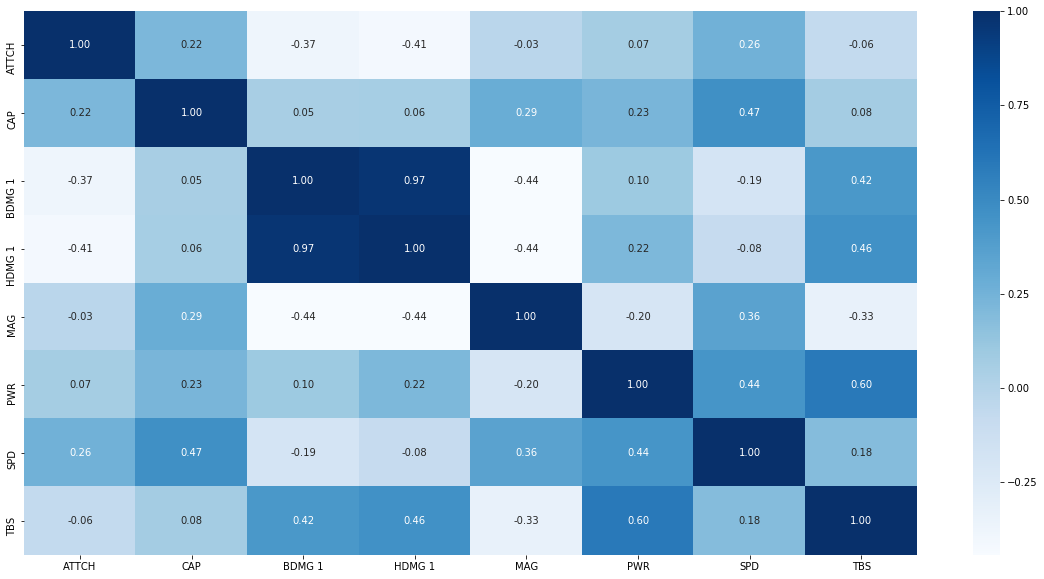

In [5]:
# declutter and plot again
fig, ax = plt.subplots(1,1, figsize=(20,10))
impt_col = ['ATTCH', 'CAP', 'BDMG 1', 'HDMG 1', 'MAG', 'PWR', 'SPD', 'TBS']
impt_var = df[impt_col]
impt_cor = sns.heatmap(impt_var.corr(), annot=True, fmt=".2f", cmap = "Blues")
# plt.savefig('impt_corr.png', bbox_inches='tight')

# higher damage guns, fewer attachments, lower magazine capacity (need to reload more often)
# also longer time between shots (need multiple shots to kill enemy), lower speed (takes longer for bullet to hit enemy)
# most important trade-offs for higher damage guns will be time between shots and speed
# focus on these from this point onwards
# since head and body damage are highly correlated, keep 1 only to reduce number of dimensions

In [6]:
df2 = df.copy()
df2 = df2.groupby('type').mean()
df2 = df2.round(2)
df2

,ATTCH,BDEL,BDMG 0,BDMG 1,BDMG 2,BDMG 3,BSHT,CAP,DMG,HDMG 0,HDMG 1,HDMG 2,HDMG 3,MAG,PWR,SPD,TBS
type,,,,,,,,,,,,,,,,,
Assault,4.00,0.02,43.70,31.64,27.12,20.29,0.3,500.00,43.70,106.17,74.33,63.68,47.75,29.00,8722.20,0.83,0.09
Bow,2.00,0.00,104.70,73.30,62.80,47.10,0.0,500.00,105.00,241.00,168.70,144.60,108.40,1.00,8000.00,0.16,0.08
DMR,3.50,0.00,53.70,37.57,32.18,24.13,0.0,500.00,51.17,120.22,84.12,72.10,54.07,11.67,16666.67,0.79,0.10
LMG,1.00,0.00,48.00,33.50,28.80,21.55,0.0,500.00,48.00,110.35,77.25,66.15,49.60,73.50,10000.00,0.82,0.09
Pistol,3.29,0.00,41.59,29.10,24.90,18.69,0.0,151.43,41.86,83.20,58.23,49.87,37.43,11.29,6833.29,0.35,0.18
SG,2.00,0.00,197.50,138.25,118.75,88.88,0.0,395.00,24.50,316.25,221.38,189.80,142.32,3.50,5750.00,0.35,0.36
SMG,3.80,0.04,33.80,23.64,20.26,15.18,1.4,500.00,33.80,60.84,42.54,36.44,27.34,25.80,6600.00,0.36,0.07
SR,3.00,0.00,103.62,72.48,62.12,46.60,0.0,500.00,81.25,205.62,143.88,123.38,92.48,5.75,23000.00,0.81,1.54


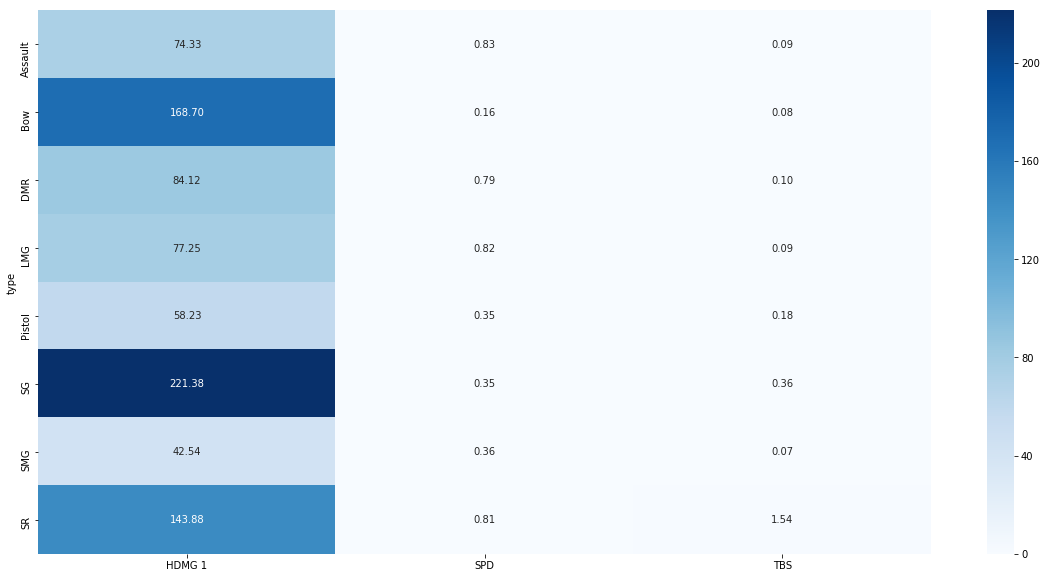

In [7]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
cols = ['HDMG 1', 'SPD', 'TBS']
type_rel = sns.heatmap(df2[cols], annot = True, fmt=".2f", cmap = 'Blues')
# plt.savefig('type_rel.png', bbox_inches='tight')

# reiterates how highest damage guns (shotgun, bow, sniper rifle) fare poorly in terms of speed, tbs or mag
# can equip 2 guns, so can look to combine high damage gun with fast gun

In [8]:
# can equip 2 guns at each time
# idea would be to equip 2 guns that complement each other
# for example, pair a high damage gun with a fast gun
# studying which gun type combinations are the best
from itertools import combinations
df3 = df2.copy()
cc = list(combinations(df3.index,2))
combine = pd.DataFrame([df3.loc[c,:].mean() for c in cc], index=cc)
combine

,ATTCH,BDEL,BDMG 0,BDMG 1,BDMG 2,BDMG 3,BSHT,CAP,DMG,HDMG 0,HDMG 1,HDMG 2,HDMG 3,MAG,PWR,SPD,TBS
"(Assault, Bow)",3.000,0.01,74.200,52.470,44.960,33.695,0.15,500.000,74.350,173.585,121.515,104.140,78.075,15.000,8361.100,0.495,0.085
"(Assault, DMR)",3.750,0.01,48.700,34.605,29.650,22.210,0.15,500.000,47.435,113.195,79.225,67.890,50.910,20.335,12694.435,0.810,0.095
"(Assault, LMG)",2.500,0.01,45.850,32.570,27.960,20.920,0.15,500.000,45.850,108.260,75.790,64.915,48.675,51.250,9361.100,0.825,0.090
"(Assault, Pistol)",3.645,0.01,42.645,30.370,26.010,19.490,0.15,325.715,42.780,94.685,66.280,56.775,42.590,20.145,7777.745,0.590,0.135
"(Assault, SG)",3.000,0.01,120.600,84.945,72.935,54.585,0.15,447.500,34.100,211.210,147.855,126.740,95.035,16.250,7236.100,0.590,0.225
"(Assault, SMG)",3.900,0.03,38.750,27.640,23.690,17.735,0.85,500.000,38.750,83.505,58.435,50.060,37.545,27.400,7661.100,0.595,0.080
"(Assault, SR)",3.500,0.01,73.660,52.060,44.620,33.445,0.15,500.000,62.475,155.895,109.105,93.530,70.115,17.375,15861.100,0.820,0.815
"(Bow, DMR)",2.750,0.00,79.200,55.435,47.490,35.615,0.00,500.000,78.085,180.610,126.410,108.350,81.235,6.335,12333.335,0.475,0.090
"(Bow, LMG)",1.500,0.00,76.350,53.400,45.800,34.325,0.00,500.000,76.500,175.675,122.975,105.375,79.000,37.250,9000.000,0.490,0.085
"(Bow, Pistol)",2.645,0.00,73.145,51.200,43.850,32.895,0.00,325.715,73.430,162.100,113.465,97.235,72.915,6.145,7416.645,0.255,0.130


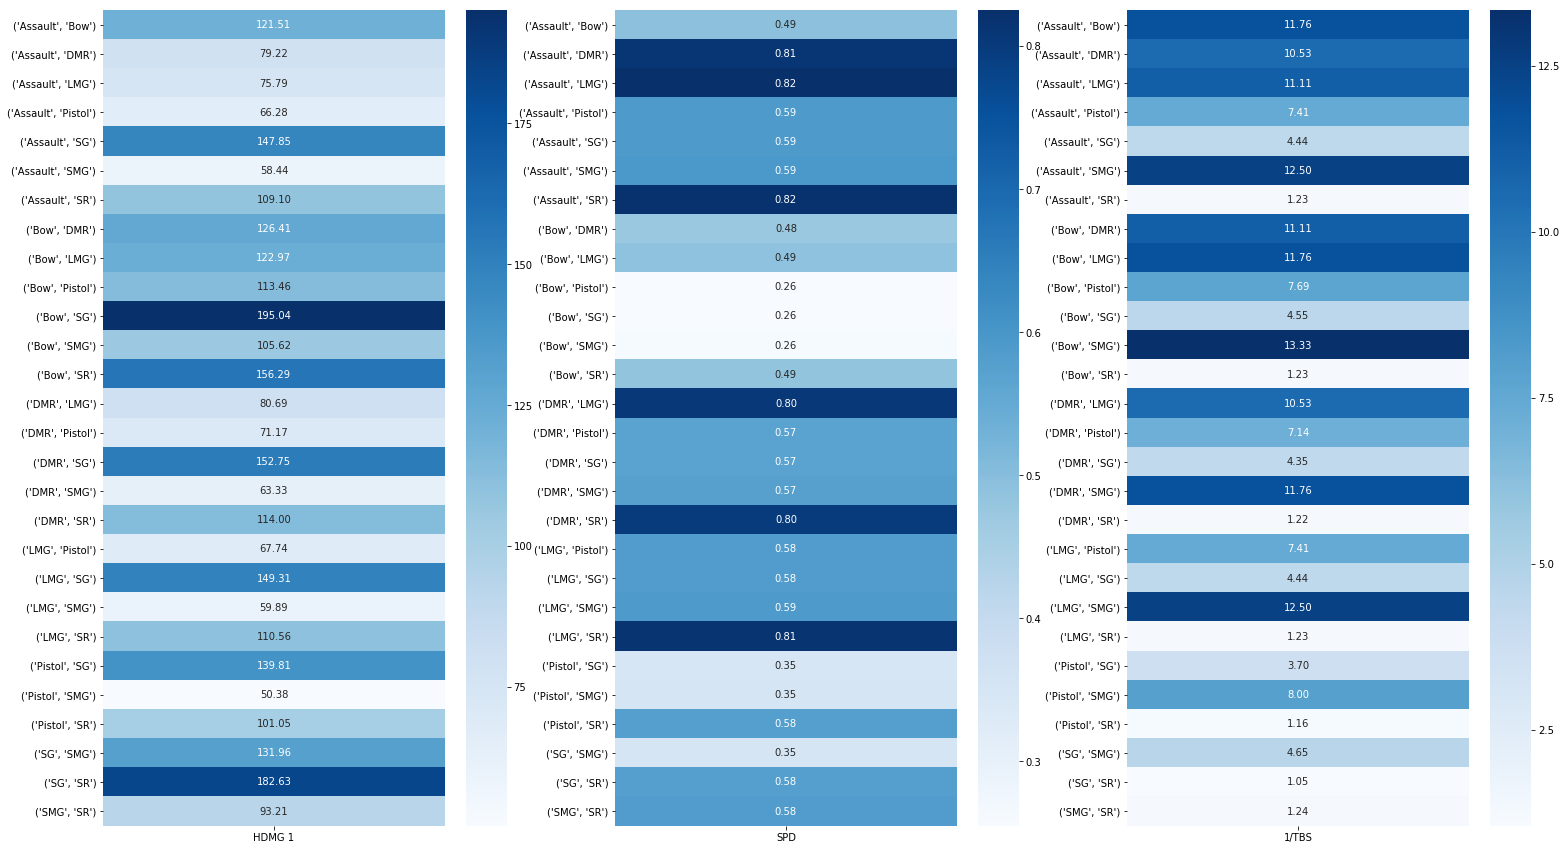

In [9]:
# split into 3 heatmaps because of differing scales
combine2 = combine.copy()
# to make it easier to spot visually, so that ideally we want all 3 values to be as large as possible
combine2['1/TBS'] = 1/combine2['TBS']
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(26,15))
col1 = ['HDMG 1']
col2 = ['SPD']
col3 = ['1/TBS']
part1 = sns.heatmap(combine2[col1], annot = True, fmt=".2f", ax=ax1, cmap = "Blues")
part2 = sns.heatmap(combine2[col2], annot = True, fmt=".2f", ax=ax2, cmap = "Blues")
part3 = sns.heatmap(combine2[col3], annot = True, fmt=".2f", ax=ax3, cmap = "Blues")

# plt.savefig('combi_heatmap.png', bbox_inches='tight')

# seems to paint a similar picture of the tradeoff between damage and speed
# but not very clear, so a correlation matrix might be better

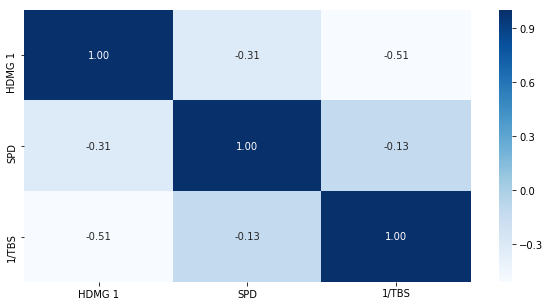

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
col4 = ['HDMG 1', 'SPD', '1/TBS']
type_rel = sns.heatmap(combine2[col4].corr(), annot = True, fmt=".2f", cmap = "Blues")

# plt.savefig('combi_corr.png', bbox_inches='tight')

# biggest trade-off is between damage and time between shots
# followed by damage and speed

## Part 3: Pareto frontier analysis
<hr>
Finding Pareto optimal combinations based on the tradeoff trends previously identified.

In [11]:
# finding Pareto optimal combinations for the tradeoff between damage and time between shots
# convert to numpy array
combine3 = combine2.copy()
combine3 = combine3[['HDMG 1', '1/TBS']]
combine3 = combine3.to_numpy()

In [12]:
# function to find Pareto optimal combinations
# credit: https://pythonhealthcare.org/tag/pareto-front/
def identify_pareto(scores):
    # Count number of items
    population_size = scores.shape[0]
    # Create a NumPy index for scores on the pareto front (zero indexed)
    population_ids = np.arange(population_size)
    # Create a starting list of items on the Pareto front
    # All items start off as being labelled as on the Parteo front
    pareto_front = np.ones(population_size, dtype=bool)
    # Loop through each item. This will then be compared with all other items
    for i in range(population_size):
        # Loop through all other items
        for j in range(population_size):
            # Check if our 'i' point is dominated by out 'j' point
            if all(scores[j] >= scores[i]) and any(scores[j] > scores[i]):
                # j dominates i. Label 'i' point as not on Pareto front
                pareto_front[i] = 0
                # Stop further comparisons with 'i' (no more comparisons needed)
                break
    # Return ids of scenarios on pareto front
    return population_ids[pareto_front]

In [13]:
# credit: https://pythonhealthcare.org/tag/pareto-front/
pareto = identify_pareto(combine3)
print ('Pareto front index values')
print ('Points on Pareto front: \n',pareto)

pareto_front = combine3[pareto]
print ('\nPareto front scores')
print (pareto_front)

Pareto front index values
Points on Pareto front: 
 [ 7  8 10 11 25]

Pareto front scores
[[126.41        11.11111111]
 [122.975       11.76470588]
 [195.04         4.54545455]
 [105.62        13.33333333]
 [131.96         4.65116279]]


In [14]:
# saving Pareto optimal combinations in dataframe
pareto_front_df = pd.DataFrame(pareto_front)
pareto_front_df2 = pareto_front_df.copy()
pareto_front_df2

,0,1
0,126.410,11.111111
1,122.975,11.764706
2,195.040,4.545455
3,105.620,13.333333
4,131.960,4.651163


In [15]:
combine4 = combine2.copy()
combine4 = combine4.reset_index()
combine4

,index,ATTCH,BDEL,BDMG 0,BDMG 1,BDMG 2,BDMG 3,BSHT,CAP,DMG,HDMG 0,HDMG 1,HDMG 2,HDMG 3,MAG,PWR,SPD,TBS,1/TBS
0,"(Assault, Bow)",3.000,0.01,74.200,52.470,44.960,33.695,0.15,500.000,74.350,173.585,121.515,104.140,78.075,15.000,8361.100,0.495,0.085,11.764706
1,"(Assault, DMR)",3.750,0.01,48.700,34.605,29.650,22.210,0.15,500.000,47.435,113.195,79.225,67.890,50.910,20.335,12694.435,0.810,0.095,10.526316
2,"(Assault, LMG)",2.500,0.01,45.850,32.570,27.960,20.920,0.15,500.000,45.850,108.260,75.790,64.915,48.675,51.250,9361.100,0.825,0.090,11.111111
3,"(Assault, Pistol)",3.645,0.01,42.645,30.370,26.010,19.490,0.15,325.715,42.780,94.685,66.280,56.775,42.590,20.145,7777.745,0.590,0.135,7.407407
4,"(Assault, SG)",3.000,0.01,120.600,84.945,72.935,54.585,0.15,447.500,34.100,211.210,147.855,126.740,95.035,16.250,7236.100,0.590,0.225,4.444444
5,"(Assault, SMG)",3.900,0.03,38.750,27.640,23.690,17.735,0.85,500.000,38.750,83.505,58.435,50.060,37.545,27.400,7661.100,0.595,0.080,12.500000
6,"(Assault, SR)",3.500,0.01,73.660,52.060,44.620,33.445,0.15,500.000,62.475,155.895,109.105,93.530,70.115,17.375,15861.100,0.820,0.815,1.226994
7,"(Bow, DMR)",2.750,0.00,79.200,55.435,47.490,35.615,0.00,500.000,78.085,180.610,126.410,108.350,81.235,6.335,12333.335,0.475,0.090,11.111111
8,"(Bow, LMG)",1.500,0.00,76.350,53.400,45.800,34.325,0.00,500.000,76.500,175.675,122.975,105.375,79.000,37.250,9000.000,0.490,0.085,11.764706
9,"(Bow, Pistol)",2.645,0.00,73.145,51.200,43.850,32.895,0.00,325.715,73.430,162.100,113.465,97.235,72.915,6.145,7416.645,0.255,0.130,7.692308


In [16]:
# appending combinations names to dataframe
combi = []
for i in pareto:
    combi.append(combine4['index'][i])

print(combi)

[('Bow', 'DMR'), ('Bow', 'LMG'), ('Bow', 'SG'), ('Bow', 'SMG'), ('SG', 'SMG')]


In [17]:
pareto_front_df2['combi'] = combi
pareto_front_df2

,0,1,combi
0,126.410,11.111111,"(Bow, DMR)"
1,122.975,11.764706,"(Bow, LMG)"
2,195.040,4.545455,"(Bow, SG)"
3,105.620,13.333333,"(Bow, SMG)"
4,131.960,4.651163,"(SG, SMG)"


In [18]:
pareto_front_df2.sort_values(0, inplace=True)
pareto_front = pareto_front_df2.values
pareto_front

array([[105.61999999999999, 13.333333333333332, ('Bow', 'SMG')],
       [122.975, 11.764705882352942, ('Bow', 'LMG')],
       [126.41, 11.11111111111111, ('Bow', 'DMR')],
       [131.96, 4.651162790697675, ('SG', 'SMG')],
       [195.04, 4.545454545454546, ('Bow', 'SG')]], dtype=object)

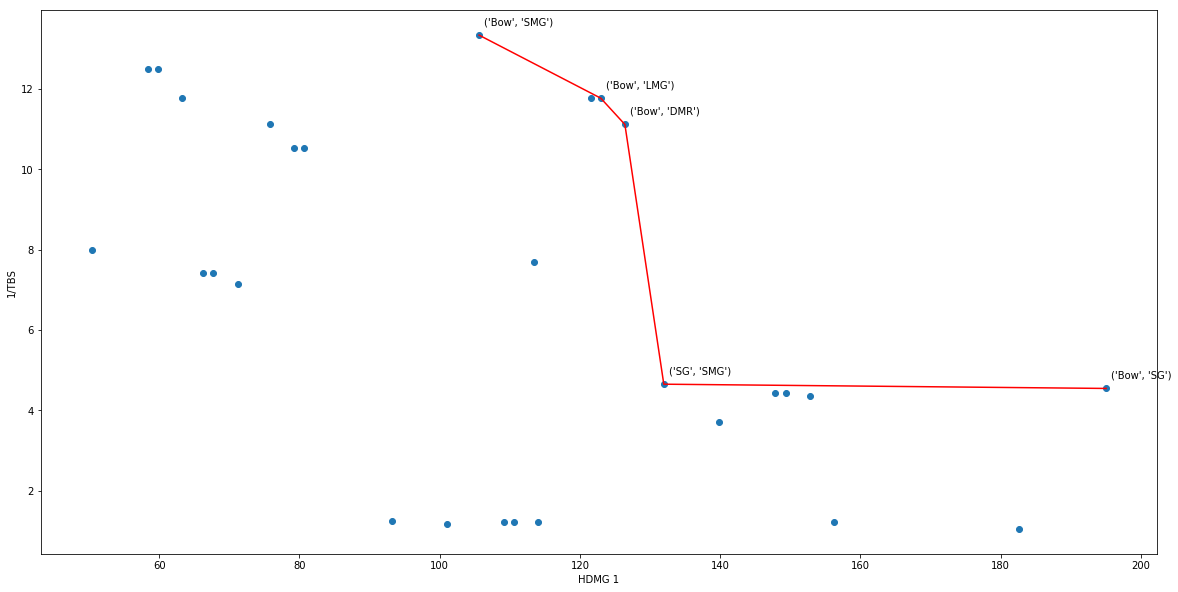

In [21]:
# plotting Pareto frontier
x_all = combine3[:, 0]
y_all = combine3[:, 1]
x_pareto = pareto_front[:, 0]
y_pareto = pareto_front[:, 1]

fig, ax = plt.subplots(1,1, figsize=(20,10))

plt.scatter(x_all, y_all)
plt.plot(x_pareto, y_pareto, color='r')

for label, x, y in zip(pareto_front[:, 2], pareto_front[:, 0], pareto_front[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(5, 10),
        textcoords='offset points', ha='left')

plt.xlabel('HDMG 1')
plt.ylabel('1/TBS')
plt.show()

# plt.savefig('dmg_tbs.png', bbox_inches='tight')

In [40]:
# finding Pareto optimal combinations for tradeoff between damage and speed
combine5 = combine2.copy()
combine5 = combine5[['HDMG 1', 'SPD']]
combine5 = combine5.to_numpy()

pareto = identify_pareto(combine5)
print ('Pareto front index values')
print ('Points on Pareto front: \n',pareto)

pareto_front = combine5[pareto]
print ('\nPareto front scores')
print (pareto_front)

Pareto front index values
Points on Pareto front: 
 [ 2  4  6 10 17 19 21 26]

Pareto front scores
[[ 75.79    0.825]
 [147.855   0.59 ]
 [109.105   0.82 ]
 [195.04    0.255]
 [114.      0.8  ]
 [149.315   0.585]
 [110.565   0.815]
 [182.63    0.58 ]]


In [41]:
# appending combinations names to dataframe
pareto_front_df3 = pd.DataFrame(pareto_front)
combi = []
for i in pareto:
    combi.append(combine4['index'][i])

print(combi)

[('Assault', 'LMG'), ('Assault', 'SG'), ('Assault', 'SR'), ('Bow', 'SG'), ('DMR', 'SR'), ('LMG', 'SG'), ('LMG', 'SR'), ('SG', 'SR')]


In [42]:
pareto_front_df3['combi'] = combi
pareto_front_df3

,0,1,combi
0,75.790,0.825,"(Assault, LMG)"
1,147.855,0.590,"(Assault, SG)"
2,109.105,0.820,"(Assault, SR)"
3,195.040,0.255,"(Bow, SG)"
4,114.000,0.800,"(DMR, SR)"
5,149.315,0.585,"(LMG, SG)"
6,110.565,0.815,"(LMG, SR)"
7,182.630,0.580,"(SG, SR)"


In [43]:
pareto_front_df3.sort_values(0, inplace=True)
pareto_front = pareto_front_df3.values
pareto_front

array([[75.78999999999999, 0.825, ('Assault', 'LMG')],
       [109.10499999999999, 0.8200000000000001, ('Assault', 'SR')],
       [110.565, 0.815, ('LMG', 'SR')],
       [114.0, 0.8, ('DMR', 'SR')],
       [147.855, 0.59, ('Assault', 'SG')],
       [149.315, 0.585, ('LMG', 'SG')],
       [182.63, 0.5800000000000001, ('SG', 'SR')],
       [195.04, 0.255, ('Bow', 'SG')]], dtype=object)

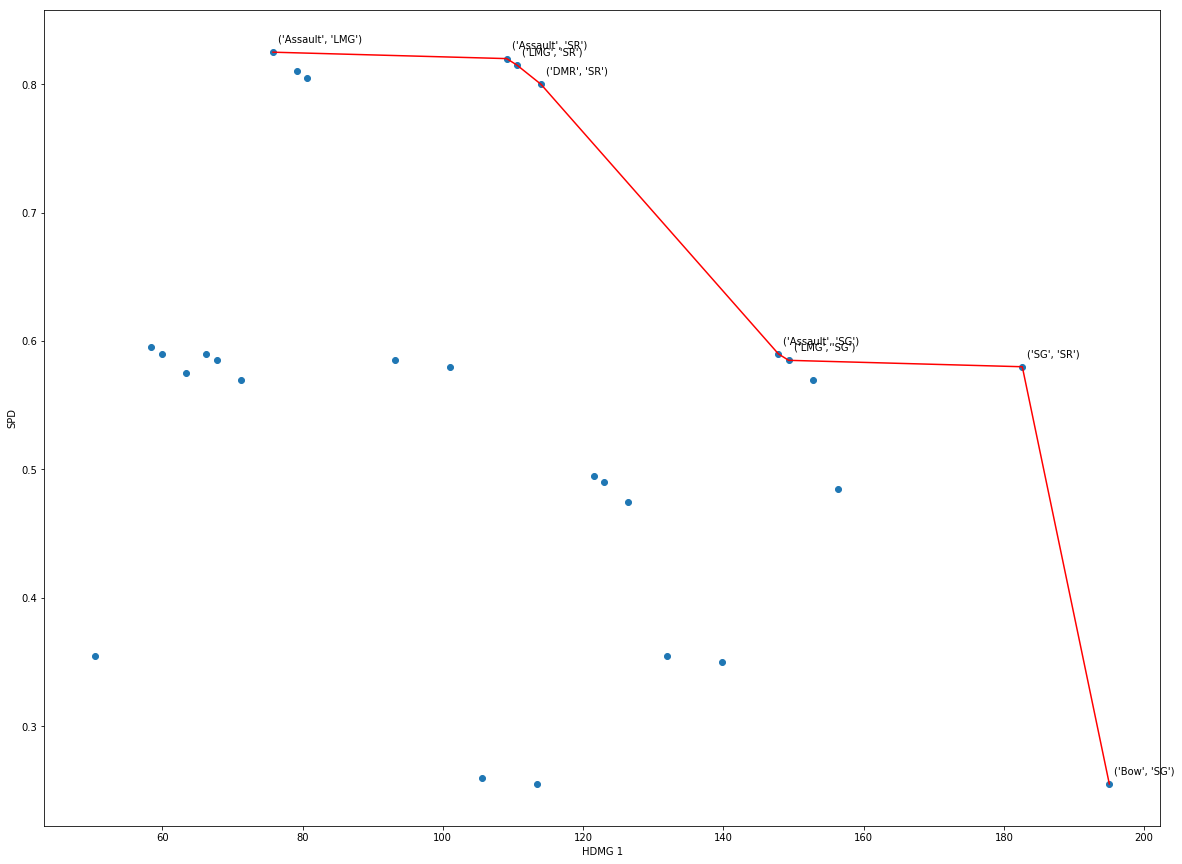

In [45]:
# plotting Pareto frontier
x_all = combine5[:, 0]
y_all = combine5[:, 1]
x_pareto = pareto_front[:, 0]
y_pareto = pareto_front[:, 1]

fig, ax = plt.subplots(1,1, figsize=(20,15))

plt.scatter(x_all, y_all)
plt.plot(x_pareto, y_pareto, color='r')

for label, x, y in zip(pareto_front[:, 2], pareto_front[:, 0], pareto_front[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(5, 10),
        textcoords='offset points', ha='left')

plt.xlabel('HDMG 1')
plt.ylabel('SPD')
plt.show()

# plt.savefig('dmg_spd.png', bbox_inches='tight')